In [1]:
import json 
import pandas as pd
import matplotlib.pyplot as plt


Ideas
- nube de hashtags
- palabras mas comunes
- revisar los tweet con mas retweets
- 

In [80]:
# file_path = '../data/uy_tweets_2020-04-07T21:07:38.850727.json
file_path = '../data/uy_tweets_2020-04-08T12:34:05.910078.json'
with open(file_path, 'r') as f:
    tweets = json.load(f)

In [82]:
dataset = []
for tweet in tweets:
    keys_tw = ['created_at', 'id', 'full_text', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang']
    keys_usr = ['screen_name', 'location', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'verified', 'statuses_count', ]
    tw = {key: tweet[key]for key in keys_tw}
    usr = {'user_' + key: tweet['user'][key]for key in keys_usr}
    tw = {**tw, **usr}
    dataset.append(tw)

In [83]:
df = pd.DataFrame(dataset)
df['created_at'] = pd.to_datetime(df['created_at'])

In [84]:
df.shape

(1663, 18)

In [86]:
df.columns

Index(['created_at', 'favorite_count', 'favorited', 'full_text', 'id',
       'is_quote_status', 'lang', 'retweet_count', 'retweeted',
       'user_created_at', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location',
       'user_screen_name', 'user_statuses_count', 'user_verified'],
      dtype='object')

In [87]:
selector = (
    (df['user_location'].isin(['Uruguay', 'Montevideo, Uruguay']))
    & (~df['user_screen_name'].duplicated())
)

In [88]:
users = df.loc[selector, 'user_screen_name'].value_counts()
users.to_csv('../data/uy_users.csv')

/home/cesar/software/houses-project/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


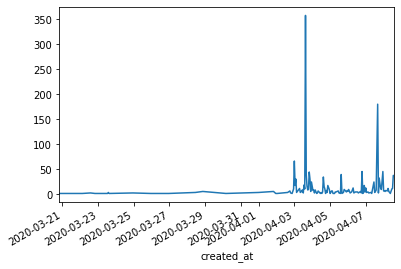

In [90]:
df.groupby([df['created_at'].dt.round('H')])['created_at'].count().plot()